In [35]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
#pip install seaborn

In [2]:
# Read first csv as a dataframe
city_data = pd.read_csv("city_data.csv")
#city_data.head()

In [3]:
# Read second csv as a dataframe
ride_data = pd.read_csv("ride_data.csv")
#ride_data.head()

In [4]:
# Merge csvs into new dataframe 
merge_data = (pd.merge(city_data, ride_data, on="city"))
#merge_data.head()

In [5]:
# Classify each city as urban, rural, or suburban
urban_rural_suburban = merge_data[["city","type"]]
urban_rural_suburban = urban_rural_suburban.groupby("city").min()
urban_rural_suburban = urban_rural_suburban.reset_index(level=None, drop=False, inplace=False)
#urban_rural_suburban.head()

In [6]:
# Calculate average fare per city
average_fare = merge_data.groupby("city").mean()["fare"]
average_fare = average_fare.to_frame()
average_fare = average_fare.reset_index(level=None, drop=False, inplace=False)
#average_fare.head()

In [7]:
# Calculate total number of rides per city
total_rides = merge_data.groupby("city").count()["ride_id"]
total_rides = total_rides.to_frame()
total_rides = total_rides.reset_index(level=None, drop=False, inplace=False)
#total_rides.head()

In [36]:
# Calculate number of drivers per city
city_drivers = city_data.groupby("city").sum()["driver_count"]
city_drivers = city_drivers.to_frame()
city_drivers = city_drivers.reset_index(level=None, drop=False, inplace=False)
city_drivers.head()

,city,driver_count
0,Alvarezhaven,21
1,Alyssaberg,67
2,Anitamouth,16
3,Antoniomouth,21
4,Aprilchester,49


In [51]:
# Merge dataframes
merge2 = (pd.merge(average_fare, total_rides, on="city"))
merge3 = (pd.merge(merge2, urban_rural_suburban, on="city"))
#merge3.head()

In [11]:
merge4 = (pd.merge(merge3, city_drivers, on="city"))
merge4.head()

,city,fare,ride_id,type,driver_count
0,Alvarezhaven,23.928710,31,Urban,21
1,Alyssaberg,20.609615,26,Urban,67
2,Anitamouth,37.315556,9,Suburban,16
3,Antoniomouth,23.625000,22,Urban,21
4,Aprilchester,21.981579,19,Urban,49


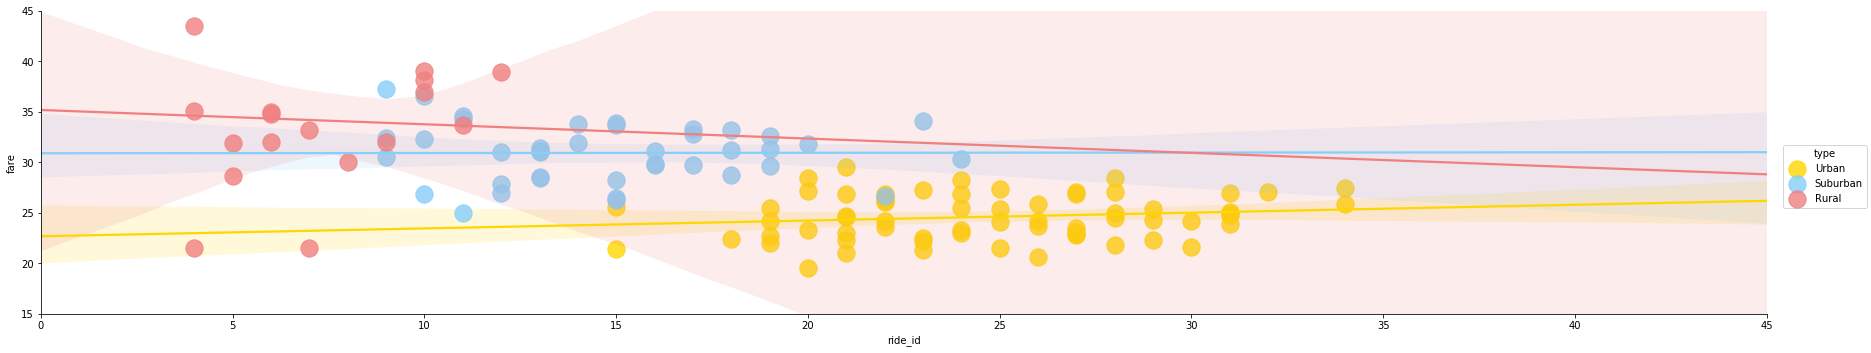

In [50]:
# Attempt at using seaborn to create bubble chart
palette = ["Gold", "#87cefa", "#f08080"]
#plt.xlim(0, 40)
#plt.ylim(0, 50)
s = merge4["driver_count"]
plot = sb.lmplot(x="ride_id", y="fare", aspect=5, data=merge4, hue="type", palette=palette, scatter_kws={"s": 300})
plot.set(ylim=(15, 45))
plot.set(xlim=(0, 45))

In [12]:
#merge4 = pd.DataFrame(
    #np.random.normal(10, 1, 30).reshape(10, 3),
    #index=pd.date_range('2010-01-01', freq='M', periods=10),
    #columns=('ride_id', 'fare', 'driver_count'))
#df['key1'] = ('rural','suburban','urban')

#sns.pairplot(x_vars=["one"], y_vars=["two"], data=merge3, hue="key1", size=5)

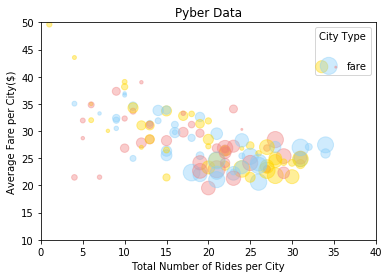

In [33]:
#Per City 
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

colors = ["Gold", "#87cefa", "#f08080"]
plt.ylim(10,50)
plt.xlim(0,40)
plt.scatter(x=merge4['ride_id'], y=merge4['fare'], s=merge4['driver_count']*4, c=colors, alpha=0.4)
# Add titles (main and on axis)
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare per City($)")
plt.title("Pyber Data")
plt.axis(aspect='equal')

# Create a legend:
# Empty lists with the desired size and label
#for area in [100, 300, 500]:
    #plt.scatter([], [], c='k', alpha=0.3, s=area,
                #label=str(area) + ' km$^2$')
plt.legend(scatterpoints=3, frameon=True, labelspacing=2, title='City Type', loc='best',
           ncol=5,
           fontsize=10)
plt.show()


In [14]:
# Count the drivers in each city type
drivers = city_data.groupby("type").sum()["driver_count"]
drivers = drivers.to_frame()
drivers = drivers.reset_index(level=None, drop=False, inplace=False)
drivers

,type,driver_count
0,Rural,104
1,Suburban,638
2,Urban,2607


In [15]:
# Find the 
city_type = merge_data.groupby("type").sum()
city_type = city_type.reset_index(level=None, drop=False, inplace=False)
city_type.head()

,type,driver_count,fare,ride_id
0,Rural,727,4255.09,658729360193746
1,Suburban,9730,20335.69,3139583688401015
2,Urban,64501,40078.34,7890194186030600


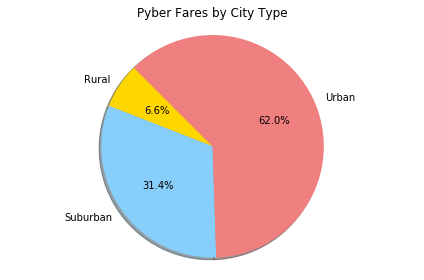

In [16]:
# Pie chart #1
plt.pie(
    # using data from groupby
    city_type['fare'],
    # with the labels being types of city
    labels=city_type['type'],
    # with shadows
    shadow=True,
    # with colors
    colors=["Gold", "#87cefa", "#f08080"],
    # with one slide exploded out
    #explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 135%
    startangle=135,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# Add a title to the chart
plt.title("Pyber Fares by City Type")

# View the plot
plt.tight_layout()
plt.show()

In [26]:
total_rides_city_type = merge_data.groupby("type").count()["ride_id"]
total_rides_city_type = total_rides_city_type.to_frame()

total_rides_city_type = total_rides_city_type.reset_index(level=None, drop=False, inplace=False)
total_rides_city_type

,type,ride_id
0,Rural,125
1,Suburban,657
2,Urban,1625


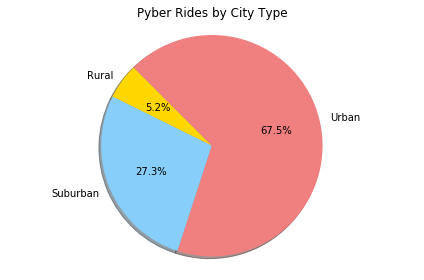

In [30]:
# Pie chart 2
# % of Total Rides by City Type

plt.pie(
    # using data from groupby
    total_rides_city_type['ride_id'],
    # with the labels being types of city
    labels=total_rides_city_type['type'],
    # with shadows
    shadow=True,
    # with colors
    colors=["Gold", "#87cefa", "#f08080"],
    # with one slide exploded out
    #explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 135%
    startangle=135,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# Add a title to the chart
plt.title("Pyber Rides by City Type")

# View the plot
plt.tight_layout()
plt.show()

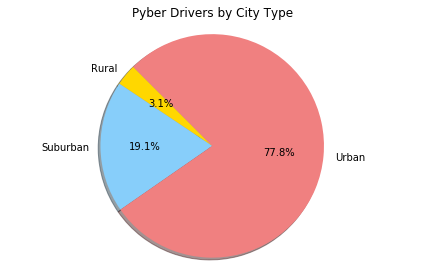

In [31]:
# Pie chart 3 
# % of Total Drivers by City Type

# Pie chart #1
plt.pie(
    # using data from groupby
    drivers['driver_count'],
    # with the labels being types of city
    labels=city_type['type'],
    # with shadows
    shadow=True,
    # with colors
    colors=["Gold", "#87cefa", "#f08080"],
    # with one slide exploded out
    #explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 135%
    startangle=135,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# Add a title to the chart
plt.title("Pyber Drivers by City Type")

# View the plot
plt.tight_layout()
plt.show()

In [ ]:
#You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
#  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
#  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.